In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

boston = load_boston()

In [4]:
# %store boston

# %store -r boston

Stored 'boston' (Bunch)


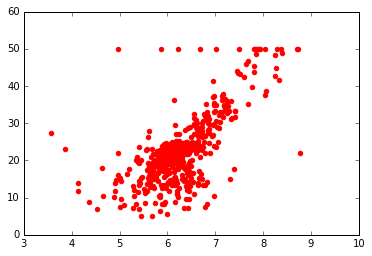

In [5]:
plt.scatter(boston.data[:,5], boston.target, color='r')

In [3]:
lr = LinearRegression()
x = boston.data[:,5]
y = boston.target
x = np.transpose(np.atleast_2d(x))
lr.fit(x, y)
y_predicted = lr.predict(x)

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print("RMSE (of training data): {:.3}".format(rmse))
r2 = r2_score(y, lr.predict(x))
print("R2 (on training data): {:.2}".format(r2))

Mean squared error (of training data): 43.6
RMSE (of training data): 6.6
R2 (on training data): 0.48


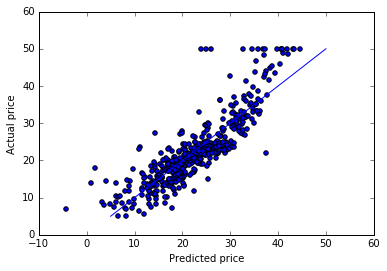

In [22]:
x = boston.data
y = boston.target
lr.fit(x, y)
p = lr.predict(x)
plt.scatter(p, y)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])


In [24]:
#Cross Validation
en = ElasticNet(alpha=0.5)
lr = LinearRegression()
ls = Lasso()

kf = KFold(len(x), n_folds=5)
p = np.zeros_like(y)
for train,test in kf:
#     lr.fit(x[train], y[train])
#     p[test] = lr.predict(x[test]) #7.3
    en.fit(x[train], y[train])
    p[test] = en.predict(x[test]) #5.6
#     ls.fit(x[train], y[train])
#     p[test] = ls.predict(x[test]) #6.0

rmse_cv = np.sqrt(mean_squared_error(p, y))
print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))

RMSE on 5-fold CV: 5.6


(100.0, 1.0000000000000001e-05)

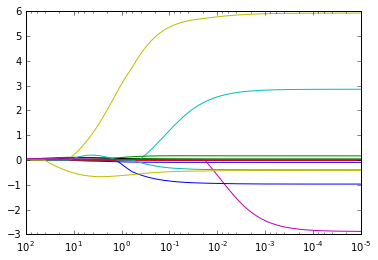

In [26]:
las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _= las.path(x, y, alphas=alphas)

fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
# Set log scale
ax.set_xscale('log')
# Make alpha decrease from left to right
ax.set_xlim(alphas.max(), alphas.min())

In [19]:
len(alphas)

1000